In [1]:
!pip install -U .

Processing /Users/tarikaltuncu/Documents/Tarik-Sync/Literature/PhD - Done/Code Repositories/GraphConstruction
  Preparing metadata (setup.py) ... done
  Created wheel for GraphConstruction: filename=GraphConstruction-1.0-py3-none-any.whl size=5060 sha256=f581bbdbf83db7f679a4b4ca8e52cc6b7d61316484863b5afdce5778f9d43e36
  Stored in directory: /private/var/folders/rg/r1h2qhf502n6zsj0xdv9t3cw0000gn/T/pip-ephem-wheel-cache-pcgwltnk/wheels/47/f5/ee/8097cfe9df6e6c76a9b0f3b2f3da8111fe2cf1fec6f1873065
Successfully built GraphConstruction
  Attempting uninstall: GraphConstruction
    Found existing installation: GraphConstruction 1.0
    Uninstalling GraphConstruction-1.0:
      Successfully uninstalled GraphConstruction-1.0


In [2]:
import numpy as np
no_vectors = 10
fixed_dim = 64
list_of_vectors = [np.random.rand(fixed_dim) for _ in range(no_vectors)]

In [3]:
from GraphConstruction.methods import vectors2distance
D = vectors2distance(list_of_vectors, metric='cosine', normalised=True)
D

array([[0.        , 0.84314187, 0.70235925, 0.73377264, 0.61592372,
        1.        , 0.63345525, 0.85137254, 0.78762722, 0.74869311],
       [0.84314187, 0.        , 0.71544249, 0.63712419, 0.6328596 ,
        0.52443453, 0.64650476, 0.66735251, 0.74571048, 0.66726676],
       [0.70235925, 0.71544249, 0.        , 0.67459838, 0.57151516,
        0.70566487, 0.73338753, 0.68013805, 0.67101633, 0.54066832],
       [0.73377264, 0.63712419, 0.67459838, 0.        , 0.68618999,
        0.71945826, 0.58312047, 0.70058979, 0.68662843, 0.63256943],
       [0.61592372, 0.6328596 , 0.57151516, 0.68618999, 0.        ,
        0.72150512, 0.654737  , 0.71637116, 0.47444022, 0.61751159],
       [1.        , 0.52443453, 0.70566487, 0.71945826, 0.72150512,
        0.        , 0.66525371, 0.55292331, 0.75152072, 0.67336675],
       [0.63345525, 0.64650476, 0.73338753, 0.58312047, 0.654737  ,
        0.66525371, 0.        , 0.67100136, 0.76630024, 0.65848615],
       [0.85137254, 0.66735251, 0.6801380

In [4]:
from GraphConstruction.methods import distance2similarity
S = distance2similarity(D)
S

array([[ 1.        ,  0.15685813,  0.29764075,  0.26622736,  0.38407628,
        -0.        ,  0.36654475,  0.14862746,  0.21237278,  0.25130689],
       [ 0.15685813,  1.        ,  0.28455751,  0.36287581,  0.3671404 ,
         0.47556547,  0.35349524,  0.33264749,  0.25428952,  0.33273324],
       [ 0.29764075,  0.28455751,  1.        ,  0.32540162,  0.42848484,
         0.29433513,  0.26661247,  0.31986195,  0.32898367,  0.45933168],
       [ 0.26622736,  0.36287581,  0.32540162,  1.        ,  0.31381001,
         0.28054174,  0.41687953,  0.29941021,  0.31337157,  0.36743057],
       [ 0.38407628,  0.3671404 ,  0.42848484,  0.31381001,  1.        ,
         0.27849488,  0.345263  ,  0.28362884,  0.52555978,  0.38248841],
       [-0.        ,  0.47556547,  0.29433513,  0.28054174,  0.27849488,
         1.        ,  0.33474629,  0.44707669,  0.24847928,  0.32663325],
       [ 0.36654475,  0.35349524,  0.26661247,  0.41687953,  0.345263  ,
         0.33474629,  1.        ,  0.32899864

In [5]:
from GraphConstruction.methods import knn_mst
k3 = knn_mst(D, k=3)

In [6]:
A = np.multiply(S, k3)
A

matrix([[ 0.        ,  0.        ,  0.29764075,  0.        ,  0.38407628,
         -0.        ,  0.36654475,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.36287581,  0.3671404 ,
          0.47556547,  0.35349524,  0.33264749,  0.        ,  0.        ],
        [ 0.29764075,  0.        ,  0.        ,  0.        ,  0.42848484,
          0.        ,  0.        ,  0.        ,  0.32898367,  0.45933168],
        [ 0.        ,  0.36287581,  0.        ,  0.        ,  0.        ,
          0.        ,  0.41687953,  0.        ,  0.        ,  0.36743057],
        [ 0.38407628,  0.3671404 ,  0.42848484,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.52555978,  0.38248841],
        [-0.        ,  0.47556547,  0.        ,  0.        ,  0.        ,
          0.        ,  0.33474629,  0.44707669,  0.        ,  0.        ],
        [ 0.36654475,  0.35349524,  0.        ,  0.41687953,  0.        ,
          0.33474629,  0.       

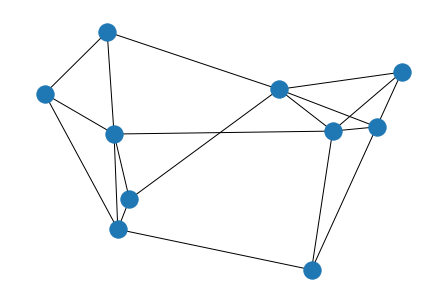

In [7]:
import networkx as nx
G = nx.from_numpy_matrix(A)
nx.draw(G, pos=nx.spectral_layout(G))